# Fitting QENS data

Previously, some quasi-elastic neutron scattering (QENS) data has been [simulated]() and [reduced](./../scipp/qens-reduction.ipynb), which can now be analysed with `easyCore`. 
Before the analysis can begin, it is necessary to import the experimental data and check that it looks reasonable. 
The importing of the data can be performed wiht `np.loadtxt` as the data has been stored in a simple space-separated column file.

In [54]:
import numpy as np

qens_data = np.loadtxt('./../scipp/qens_energy_transfer_known_quasi_elastic_3_pulse.xye', unpack=True)

<ErrorbarContainer object of 3 artists>

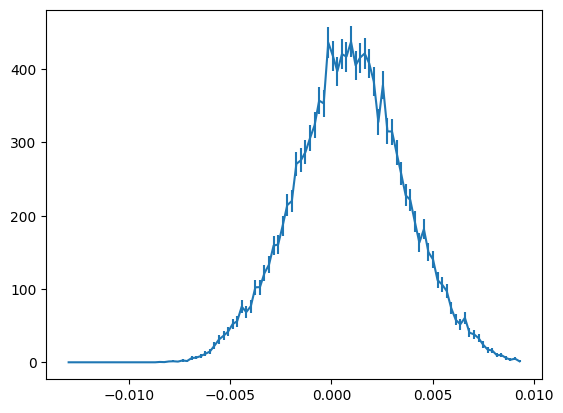

In [55]:
import matplotlib.pyplot as plt

plt.errorbar(*qens_data)

In [56]:
i

array([8.70316235e-10, 0.00000000e+00, 1.65908876e-18, 3.23358597e-09,
       4.12543128e-04, 1.42841970e-05, 1.27996777e-10, 2.77631358e-20,
       2.32026260e-18, 1.54377469e-03, 2.25680326e-06, 4.11702613e-04,
       8.92455892e-09, 4.28060339e-05, 6.92341901e-04, 2.65137276e-06,
       1.26071405e-04, 1.22950288e-03, 3.03909882e-04, 3.19573614e-03,
       4.66391201e-01, 2.61734996e-01, 9.60994235e-01])

In [147]:
q, i, di = qens_data[:, np.where((qens_data[0] > -0.007) & (qens_data[0] < 0.007))[0]]

In [164]:
from easyCore.Objects.Variable import Parameter

x = Parameter(name='x', value=0.001, fixed=False, min=0, max=0.002)
hwhm = Parameter(name='hwhm', value=3.5e-3, fixed=False, min=1e-4, max=10)
A = Parameter(name='A', value=1, fixed=False, min=0.01, max=100)
sigma = Parameter(name='sigma', value=0.001, fixed=False, min=0.0000001, max=0.1)

In [165]:
from scipy.stats import norm

In [166]:
def lorentzian(omega, *args, **kwargs):
    a = A.raw_value / np.pi * hwhm.raw_value / ((omega - x.raw_value) ** 2 + hwhm.raw_value ** 2)
    b = norm(0, sigma.raw_value).pdf(omega)
    b /= b.sum()
    return np.convolve(a, b, 'same')

In [167]:
x.raw_value

0.001

In [168]:
q.shape

(62,)

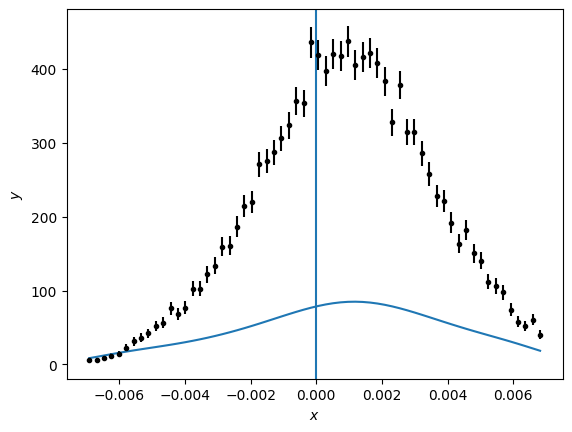

In [169]:
plt.errorbar(q, i, di, marker='.', ls='', color='k')
plt.plot(q, lorentzian(q), '-')
plt.axvline(0)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [170]:
from easyCore.Objects.ObjectClasses import BaseObj
from easyCore.Fitting.Fitting import Fitter

params = BaseObj(name='params', x=x, hwhm=hwhm, A=A, offset=offset, sigma=sigma)
f = Fitter(params, lorentzian)

In [171]:
f.available_methods()

['least_squares',
 'leastsq',
 'differential_evolution',
 'basinhopping',
 'ampgo',
 'nelder',
 'lbfgsb',
 'powell',
 'cg',
 'newton',
 'cobyla',
 'bfgs']

In [172]:
res = f.fit(x=q, y=i, weights=1/di)

In [173]:
x, hwhm, A, offset, sigma

(<Parameter 'x': 0.000751+/-0.000024, bounds=[0:0.002]>,
 <Parameter 'hwhm': 0.00030+/-0.00005, bounds=[0.0001:10]>,
 <Parameter 'A': 2.903+/-0.031, bounds=[0.01:100]>,
 <Parameter 'offset': 0.0+/-0 (fixed), bounds=[0:10]>,
 <Parameter 'sigma': 0.00256+/-0.00004, bounds=[1e-07:0.1]>)

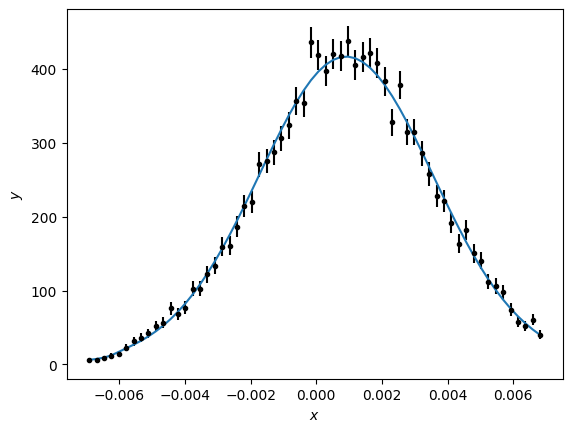

In [174]:
plt.errorbar(q, i, di, marker='.', ls='', color='k')
plt.plot(q, lorentzian(q), '-')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [175]:
x.value

<Measurement(0.0007509375818549591, 2.370712017424164e-05, dimensionless)>

In [176]:
hwhm.value

<Measurement(0.000297838579367921, 5.440647918705588e-05, dimensionless)>

In [177]:
A.value

<Measurement(2.9032087929700943, 0.030859346719080326, dimensionless)>

In [178]:
offset.value

<Measurement(0.0, 0.0, dimensionless)>

In [179]:
sigma.value

<Measurement(0.0025555916234974783, 4.060376672132829e-05, dimensionless)>